In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv('zomato.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [4]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        7105 non-null   object 
 1   restaurant type        7105 non-null   object 
 2   rate (out of 5)        7037 non-null   float64
 3   num of ratings         7105 non-null   int64  
 4   avg cost (two people)  7048 non-null   float64
 5   online_order           7105 non-null   object 
 6   table booking          7105 non-null   object 
 7   cuisines type          7105 non-null   object 
 8   area                   7105 non-null   object 
 9   local address          7105 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 555.2+ KB


In [6]:
#Нужно проверить характер потерянных данных - либо это систематическая ошибка, либо данные отсутствуют по другим причинам

<AxesSubplot:>

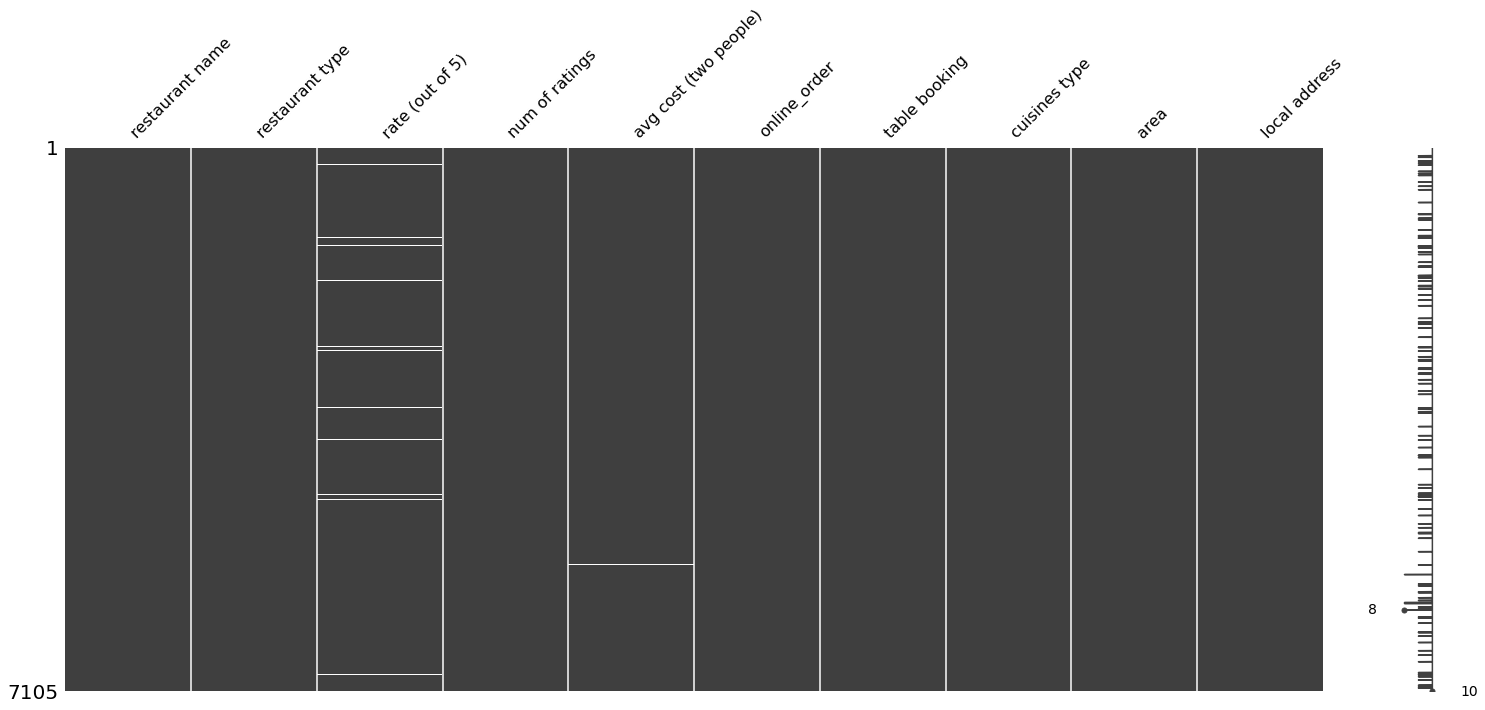

In [7]:
msno.matrix(data)

<AxesSubplot:>

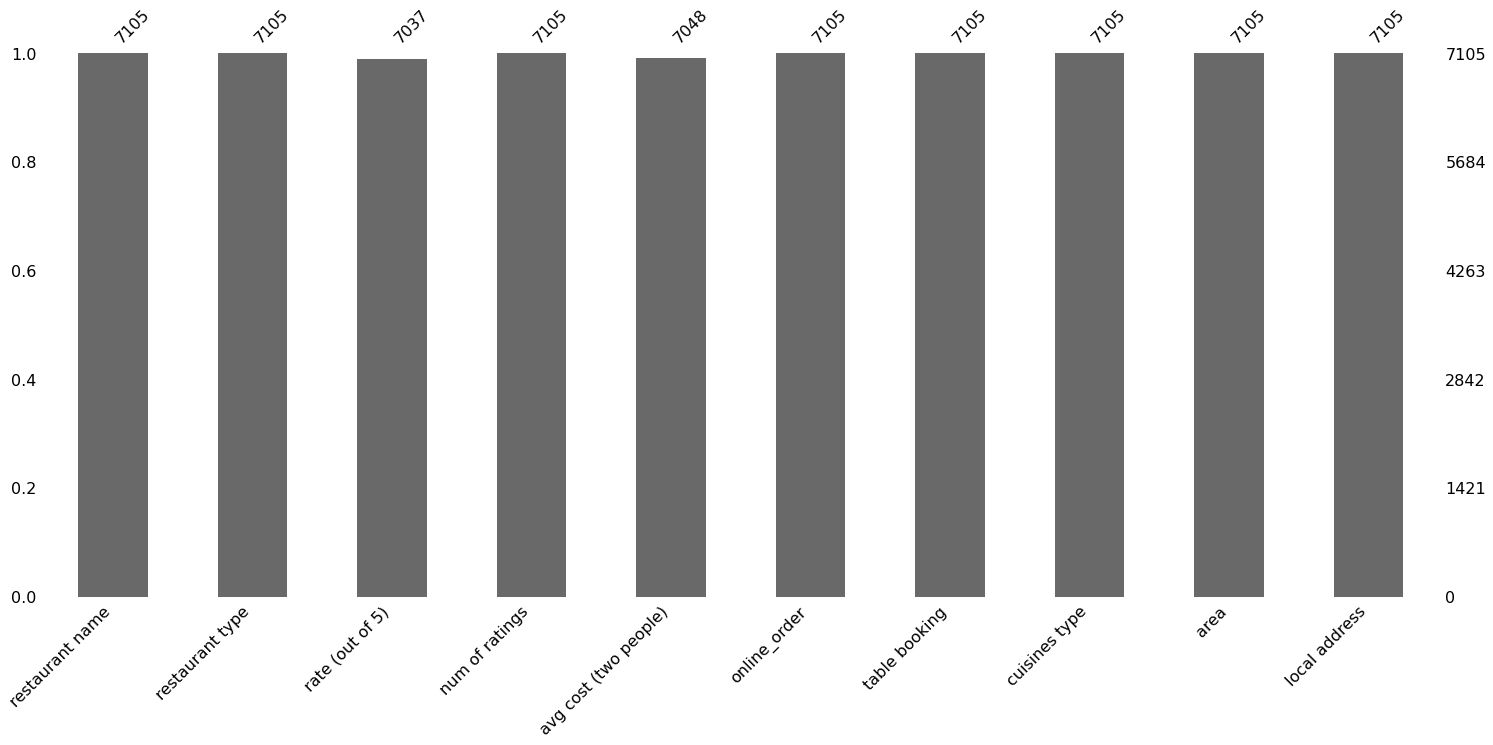

In [8]:
msno.bar(data)

In [9]:
#Подставлять рейтинг ресторану по медиане, среднему не имеет смысла - место может быть как очень плохим, так и очень хорошим
#Но при этом это может повлиять на показатели, поэтому я избавлюсь от ресторанов с отсутствующими значениями рейтинга
#среднего чека

In [10]:
data = data.dropna()

# Гипотеза №1: на рейтинг и количество отзывов сказывается тип заведения 

In [11]:
data.groupby(['restaurant type'], as_index=False)\
    .agg({'num of ratings': ['mean', 'median', 'count'], 'rate (out of 5)' : ['mean', 'median', 'count']})\
    .sort_values(by=([('num of ratings', 'median'), ('rate (out of 5)', 'median')]), ascending=(False, False))\
    .head(10)

restaurant type num of ratings               rate (out of 5)  \
                                         mean  median count            mean   
63           Microbrewery, Pub    5044.000000  5892.0     8        4.462500   
67           Pub, Microbrewery    5154.666667  5068.5     6        4.400000   
57        Lounge, Microbrewery    4650.000000  4650.0     1        3.700000   
24  Casual Dining, Irani Cafee    3651.000000  3651.0     1        4.400000   
59                Microbrewery    6443.000000  3318.5     6        4.216667   
44         Fine Dining, Lounge    2229.000000  2229.0     1        4.400000   
62        Microbrewery, Lounge    2212.000000  2212.0     1        4.200000   
55                Lounge, Cafe    1717.000000  1717.0     1        3.900000   
56       Lounge, Casual Dining    1945.500000  1551.0     6        4.116667   
60           Microbrewery, Bar    1213.000000  1213.0     1        4.400000   

                 
   median count  
63   4.50     8  
67   4.40     6  
57   3.70     1  
24   4.40     1  
59   4.30     6  
44   4.40     1  
62   4.20     1  
55   3.90     1  
56   4.15     6  
60   4.40     1

Топ 3 занимают пабы и микропивоварни, они имеют достаточно высокий средний рейтинг с 
большим количеством отзывов (больше 5 тысяч).

Однако сразу всплыла проблема сбора данных - мы видим, что в графе с типом представлен не один тип, 
а список записанный строкой. К примеру первые две строки должны быть объединены группировкой.

Чтобы наши исследования были релевантными, нужно развернуть строку в список, отсортировать (без разницы как) и снова вернуть строку

In [12]:
data['restaurant type'] = data['restaurant type'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))

In [13]:
data.groupby(['restaurant type'], as_index=False)\
    .agg({'num of ratings': ['mean', 'median', 'count'], 'rate (out of 5)' : ['mean', 'median', 'count']})\
    .sort_values(by=([('num of ratings', 'median'), ('rate (out of 5)', 'median')]), ascending=(False, False))\
    .head(10)

restaurant type num of ratings               rate (out of 5)  \
                                          mean  median count            mean   
54            Microbrewery, Pub    5091.428571  5892.0    14        4.435714   
26   Casual Dining, Irani Cafee    3651.000000  3651.0     1        4.400000   
49         Lounge, Microbrewery    3431.000000  3431.0     2        3.950000   
53                 Microbrewery    6443.000000  3318.5     6        4.216667   
42          Fine Dining, Lounge    2229.000000  2229.0     1        4.400000   
10            Bar, Microbrewery    1213.000000  1213.0     1        4.400000   
21                 Cafe, Lounge    1041.500000  1041.5     2        4.150000   
28  Casual Dining, Microbrewery    1376.318182   937.5    22        4.172727   
43    Fine Dining, Microbrewery     755.000000   755.0     1        4.300000   
32                         Club     904.000000   628.0     5        4.020000   

                 
   median count  
54   4.50    14  
26   4.40     1  
49   3.95     2  
53   4.30     6  
42   4.40     1  
10   4.40     1  
21   4.15     2  
28   4.30    22  
43   4.30     1  
32   4.00     5

Как видим такая очистка данных принесла свои плоды - топ 10 изменился и теперь лучше отвечает нашим требованиям. Микропивоварни всё ещё лидируют. Также можно заметить, что есть сочетания "Микропивоварня, паб" и "Бар, микропивоварня". В целом они похожи, но мы не будем углублятся в дебри определений и оставим как есть.  

Теперь нам нужно ответить на главный вопрос нашей гипотезы: влияет ли тип заведения на рейтинг и отзывы. Для этого возьмём топ 5 в нашей выборке и проверим все ли заведения соответствуют этому критерию.

In [14]:
data[data['restaurant type']=='Microbrewery, Pub']

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
423,Arbor Brewing Company,"Microbrewery, Pub",4.5,8375,2000.0,No,Yes,"American, Continental, Salad",Brigade Road,Brigade Road
757,Biergarten,"Microbrewery, Pub",4.7,6865,2400.0,No,Yes,"Continental, European, BBQ, Chinese, Asian",Brookefield,Whitefield
770,Big Pitcher,"Microbrewery, Pub",4.6,9272,1800.0,No,Yes,"American, Continental, North Indian, Mediterra...",Old Airport Road,Old Airport Road
958,Brew and Barbeque - A Microbrewery Pub,"Microbrewery, Pub",4.6,5894,1400.0,Yes,Yes,"Continental, North Indian, BBQ, Steak",Marathahalli,Marathahalli
2632,Hoot,"Microbrewery, Pub",4.2,7193,1400.0,Yes,Yes,"Continental, Italian, North Indian",Bellandur,Sarjapur Road
4090,Murphy's Brewhouse - The Paul Bangalore,"Microbrewery, Pub",4.3,2031,1700.0,No,Yes,"Continental, North Indian, Finger Food",Indiranagar,Domlur
4808,Prost Brew Pub,"Microbrewery, Pub",4.5,7854,1800.0,No,Yes,"American, Continental, North Indian, Salad",Koramangala 4th Block,Koramangala 4th Block
4997,Red Rhino,"Microbrewery, Pub",4.4,1980,1700.0,Yes,Yes,"Continental, Mediterranean, South Indian, Nort...",Whitefield,Whitefield
6226,The Biere Club,"Microbrewery, Pub",4.3,2283,1700.0,No,Yes,"Continental, BBQ, Finger Food",Whitefield,Whitefield
6479,The Pallet,"Microbrewery, Pub",4.5,2745,1600.0,No,Yes,"Continental, Mediterranean, Italian, North Ind...",Whitefield,Whitefield


In [15]:
data[data['restaurant type']=='Casual Dining, Irani Cafee']

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
5614,Soda Bottle Opener Wala,"Casual Dining, Irani Cafee",4.4,3651,1300.0,Yes,Yes,"Parsi, North Indian",Brigade Road,Lavelle Road


In [16]:
data[data['restaurant type']=='Lounge, Microbrewery']

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
580,Bangalore Brew Works,"Lounge, Microbrewery",4.2,2212,1700.0,No,Yes,"Continental, Italian",Brigade Road,Residency Road
618,Barleyz,"Lounge, Microbrewery",3.7,4650,2000.0,No,No,"North Indian, Continental, Chinese",Koramangala 4th Block,Koramangala 6th Block


In [17]:
data[data['restaurant type']=='Microbrewery']

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
48,46 Ounces Brewgarden,Microbrewery,2.8,40,1600.0,No,Yes,"Bar Food, Finger Food, Pizza",Electronic City,Electronic City
967,Brewsky,Microbrewery,4.3,4321,1600.0,Yes,Yes,"Continental, American",Jayanagar,JP Nagar
1035,Byg Brewski Brewing Company,Microbrewery,4.9,16345,1600.0,Yes,Yes,"Continental, North Indian, Italian, South Indi...",Bellandur,Sarjapur Road
1878,District 6 Pub Brewery & Kitchen,Microbrewery,4.3,2316,1800.0,No,No,"German, European, Pizza, American, North India...",Malleshwaram,Malleshwaram
6500,The Pump House,Microbrewery,4.3,680,1500.0,No,No,"Continental, Finger Food",JP Nagar,JP Nagar
6665,Toit,Microbrewery,4.7,14956,1500.0,No,No,"Italian, American, Pizza",Indiranagar,Indiranagar


In [18]:
data[data['restaurant type']=='Fine Dining, Lounge']

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
5416,Shiro,"Fine Dining, Lounge",4.4,2229,3000.0,Yes,Yes,"Japanese, Asian",Brigade Road,Lavelle Road


Суммарно у нас 24 заведения, из которых только 1 заведение "46 Ounces Brewgarden" имеет низкую оценку 2.8 и мало отзывов. Также есть "Barleyz" с оценкой 3.7, что ниже медианы, но с большим количеством отзывов 4650. В топ 5 вошли заведения со своей микропивоварней, что может говорить о том, что наша гипотеза состоялась: тип заведения влияет на рейтинг и количество отзывов.  

Напоследок каких заведений больше всего в датасете.

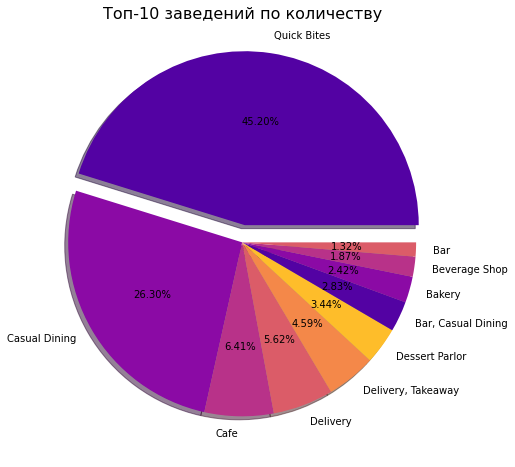

In [19]:
restaurant_type = data['restaurant type'].value_counts().head(10)
plt.figure(figsize=(10, 8))
plt.pie(data=restaurant_type, x=restaurant_type.values, 
        labels=restaurant_type.index, autopct='%1.2f%%',
        colors=sns.color_palette('plasma'), explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),
        shadow=True)
plt.title('Топ-10 заведений по количеству', fontsize=16)
plt.show()

Количество уступает качеству.

# Гипотеза 2 - рейтинг влияет на количество отзывов

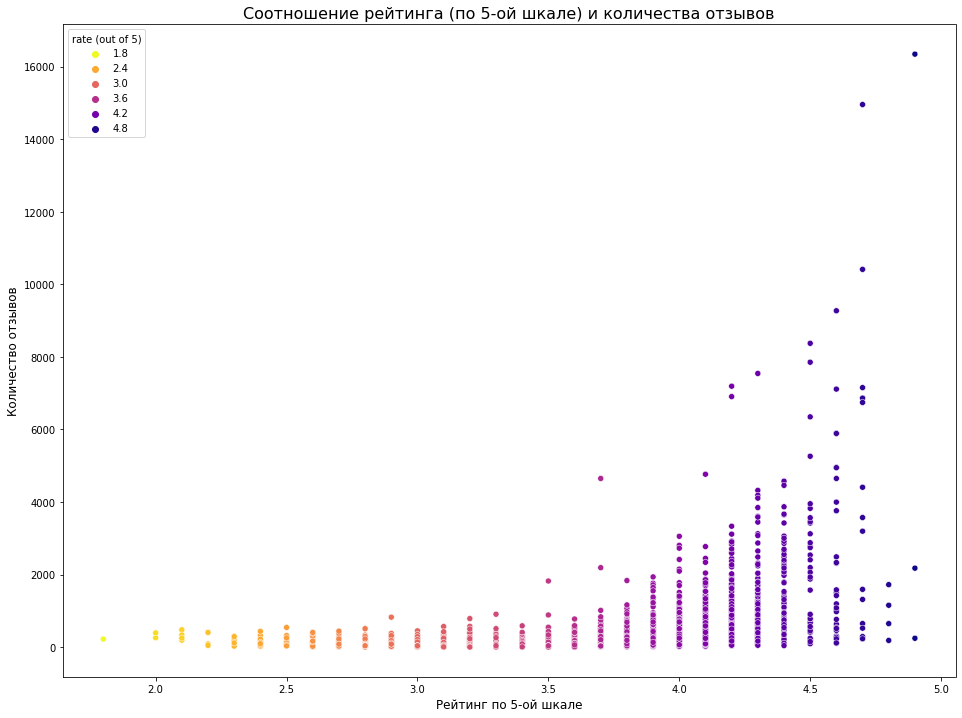

In [20]:
plt.figure(figsize=(16, 12))
x_label = range(len(data))
sns.scatterplot(data=data, y='num of ratings', x='rate (out of 5)', hue='rate (out of 5)', palette='plasma_r')
plt.title('Соотношение рейтинга (по 5-ой шкале) и количества отзывов', fontsize=16)
plt.xlabel('Рейтинг по 5-ой шкале', fontsize=12)
plt.ylabel('Количество отзывов', fontsize=12)
plt.show()

In [21]:
data['rate (out of 5)'].median()

3.5

Какой вывод можно сделать из этого графика? С рейтинга ~3.8 мы видим рост количества отзывов, однако после отметки 4.5 происходит спад, если мы не берём в рассчёт явные выбросы. О чём это может говорить:

1) хорошие заведения привлекают больше посетителей и те чаще оставляют положительные отзывы, что в свою очередь привлекает новых посетителей
2) для плохих заведений правило тоже - плохое обсуживание, низкая оценка, мало отзывов. Заведений с большим количеством отзывов и низким рейтингом нет даже в рамках выбросов.
3) получить очень высокие оценки, выше 4.5 и иметь большое количество отзывов достаточно сложная задача, с которой справляется небольшое количество заведений

Гипотеза 2 подтверждена

# Гипотеза 3: средний чек на 2 человек влияет на рейтинг/количество отзывов

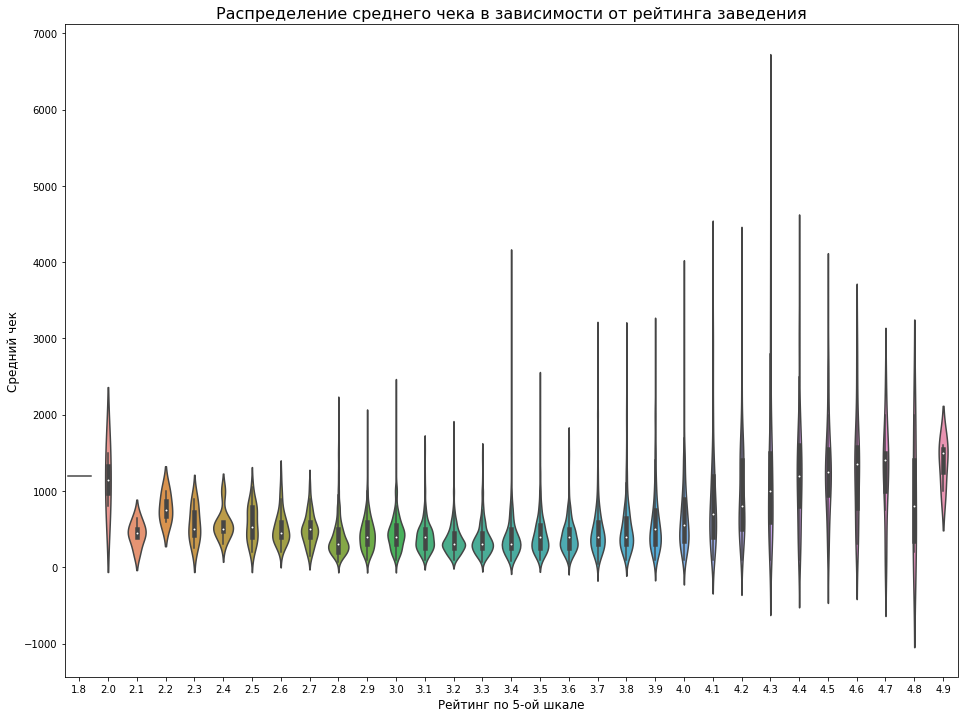

In [22]:
plt.figure(figsize=(16, 12))
x_label = range(len(data))
sns.violinplot(data=data, y='avg cost (two people)', x='rate (out of 5)')
plt.title('Распределение среднего чека в зависимости от рейтинга заведения', fontsize=16)
plt.xlabel('Рейтинг по 5-ой шкале', fontsize=12)
plt.ylabel('Средний чек', fontsize=12)
plt.show()

In [23]:
data['rate (out of 5)'].median()

3.5

In [24]:
data['avg cost (two people)'].median()

400.0

*Возможно это особенность violinplot, но стоимости меньше 40 в данных нет.*

2.0 - первая отметка, которая нас интересует. Обратите внимание на достаточно большой размах - от 40 до 2500. Высокая стоимость не всегда будет означать, что вас вкусно накормят.

2.8 - отметка, с которой начинается увеличение длины правого (верхнего) хвоста, отвечающего за рост цены, при этом до отметки 3.8 медиана практически не смещается. Таким образом средний по качеству ресторан с оценкой от 2.8 до 3.8 обойдётся в 400.

3.8 - отметка с которой начинает увеличиваться межквартильный размах и начинается рост хвостов в обе стороны. Данные становятся более разнообразными. Хороший ресторан может быть как недорогим (возможно одна из причин высокой оценки), так и дорогим с хорошим качеством блюд, интерьером, музыкой и т.д.

Однако, самое важное для нас - это рост медианы с отметки 4.0 до 4.7. Это означает обратное к нашей гипотезе заключение: за хороший ресторан придётся выложить приличную сумму. 

Гипотеза относительно влияния среднего чека на рейтинг не состоялась. Можно пообедать в ресторане с рейтингом 2.0 за 2500 или в ресторане с рейтингом 4.0 и выше за 1000. 

In [25]:
data['num of ratings'].median()

40.0

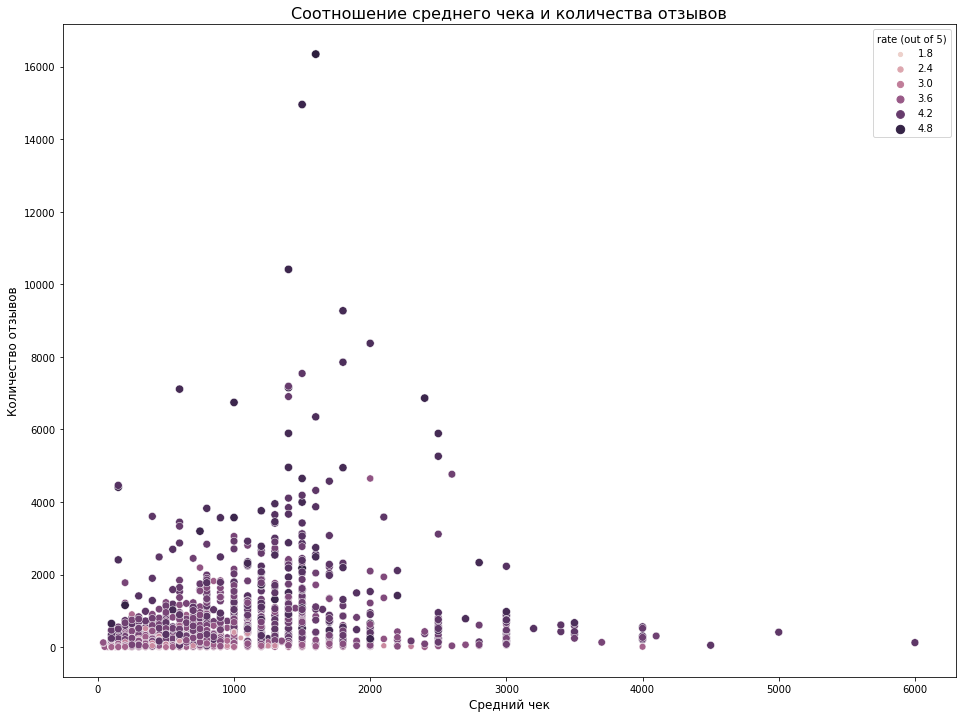

In [26]:
plt.figure(figsize=(16, 12))
x_label = range(len(data))
sns.scatterplot(data=data, x='avg cost (two people)', y='num of ratings', size='rate (out of 5)', hue='rate (out of 5)')
plt.title('Соотношение среднего чека и количества отзывов', fontsize=16)
plt.xlabel('Средний чек', fontsize=12)
plt.ylabel('Количество отзывов', fontsize=12)
plt.show()

1) Очень много заведений со средним чеком меньше 1000 и количеством отзывов меньше 1000
2) Увеличение стоимости обеда привод к росту количества отзывов до ~2700, дальше идёт резкий спад, однако, есть заведения к высокой стоимостью и небольшим количеством отзывов. 
3) Дорогие заведения, со средним чеком выше 3000, может позволить себе ограниченный круг лиц, поэтому количество отзывов резко падает.

Гипотеза 3 отклонена: прямой связи среднего чека с рейтингом и количеством отзывов не прослеживается.

Высокие оценки и большое количество отзывов может получить даже недорогое заведение. Более вероятно, наличие иных факторов влияющих на оценку посетителями (виды еды, расположение, качество блюд и т.д.)

# Гипотеза 4: на оценку и количество отзывов влияет наличие онлайн-заказ

Для начала оценим, соотношения заведений с онлайн-заказами и без

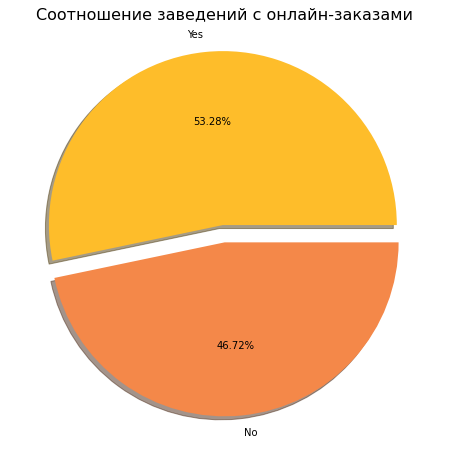

In [27]:
online_order = data['online_order'].value_counts().head(10)
plt.figure(figsize=(10, 8))
plt.pie(data=online_order, x=online_order.values, labels=online_order.index, autopct='%1.2f%%',
        colors=sns.color_palette('plasma_r'), shadow=True, explode=(0.1, 0))
plt.title('Соотношение заведений с онлайн-заказами', fontsize=16)
plt.show()

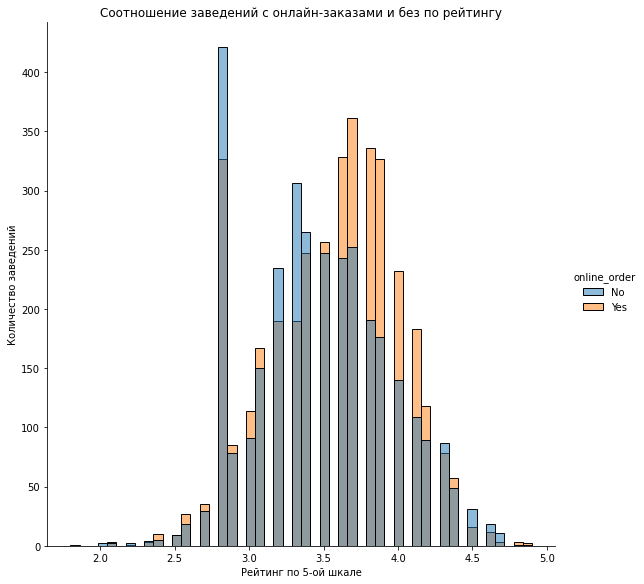

In [28]:
sns.displot(data=data, x='rate (out of 5)', hue='online_order', height=8)
plt.title('Соотношение заведений с онлайн-заказами и без по рейтингу')
plt.xlabel('Рейтинг по 5-ой шкале')
plt.ylabel('Количество заведений')
plt.show()

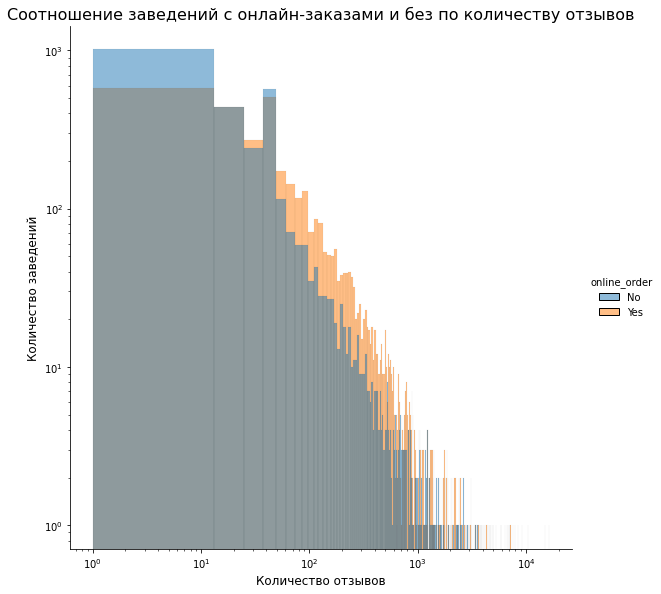

In [29]:
sns.displot(data=data, x='num of ratings', hue='online_order', height=8)
plt.yscale('log')
plt.xscale('log')
plt.title('Соотношение заведений с онлайн-заказами и без по количеству отзывов', fontsize=16)
plt.xlabel('Количество отзывов', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.show()

Интерпретация графиков: "Количество заведений с онлайн-заказом, получающих много отзывов, больше, чем заведений без онлайн заказа".

Теорию можно считать частично подтверждённой, так как возможны неизвестные факторы влияющие на решение посетителей. 

# Гипотеза 5: Бронированние столиков влияет на рейтинг и количество отзывов

Проверим, сколько заведений предоставляют услугу бронирования столиков

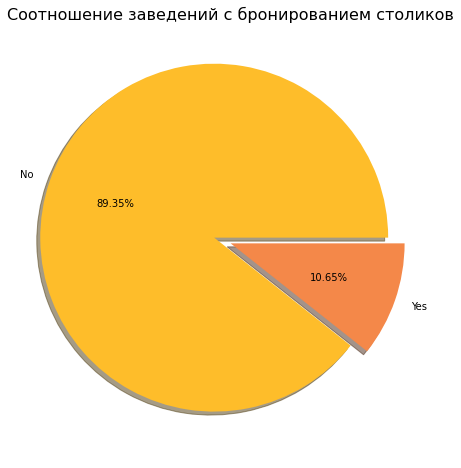

In [30]:
table_booking = data['table booking'].value_counts().head(10)
plt.figure(figsize=(10, 8))
plt.pie(data=table_booking, x=table_booking.values, labels=table_booking.index, autopct='%1.2f%%',
        colors=sns.color_palette('plasma_r'), shadow=True, explode=(0.1, 0))
plt.title('Соотношение заведений с бронированием столиков', fontsize=16)
plt.show()

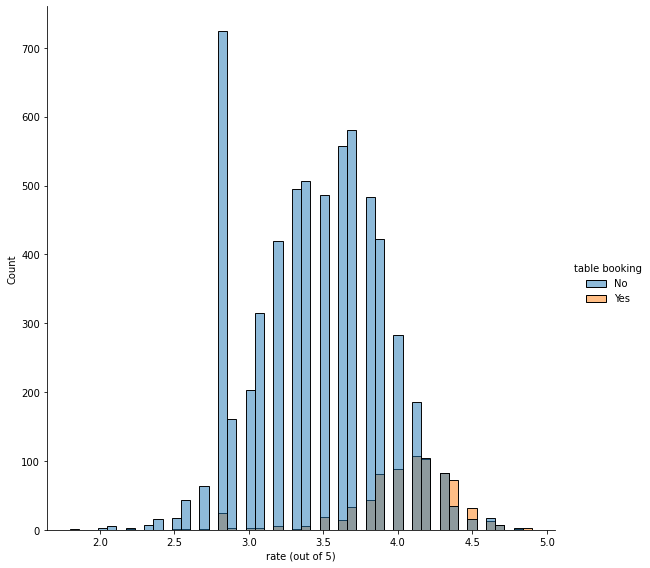

In [31]:
sns.displot(data=data, x='rate (out of 5)', hue='table booking', height=8)
plt.show()

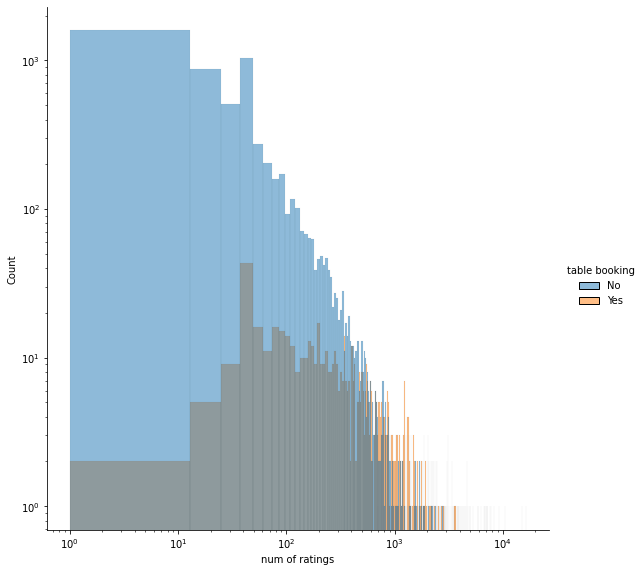

In [32]:
sns.displot(data=data, x='num of ratings', hue='table booking', height=8)
plt.yscale('log')
plt.xscale('log')
plt.show()

С учётом того, что соотношение 9:1 и при этом заведения с бронированием столиков имеют в среднем имеют рейтинг выше медианы плюс большое количество отзывов, можно подтвердить гипотезу, что бронирование столиков влияет как на рейтинг, так и на количество отзывов.

# Гипотеза 6: в выборке присутствую сетевые рестораны

In [33]:
data.groupby('restaurant name', as_index=False).agg('count').sort_values(by='restaurant type', ascending=False)

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,#FeelTheROLL,1,1,1,1,1,1,1,1,1
4652,Pizza Stop,1,1,1,1,1,1,1,1,1
4663,Poha On Wheels,1,1,1,1,1,1,1,1,1
4662,Poha House,1,1,1,1,1,1,1,1,1
4661,Podi Idly,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2324,Godavari Delights,1,1,1,1,1,1,1,1,1
2323,Gobi Gate,1,1,1,1,1,1,1,1,1
2322,Gobi Corner,1,1,1,1,1,1,1,1,1
2321,Gobble Up Churros Cafe,1,1,1,1,1,1,1,1,1


Гипотеза отвергнута

# Гипотеза 7: тип блюд (кухня) влияет на рейтинг и количество оценков

Чтобы проверить данную теорию, повторим шаг, который мы делали с типом ресторана. Превратим строку из cuisines type в список, отсортируем и снова превратим в строку. Это позволить нам выполнить правильную группировку данных

In [34]:
data['cuisines type'] = data['cuisines type'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))

In [35]:
data.groupby(['cuisines type'], as_index=False)\
    .agg({'num of ratings': ['mean', 'median', 'count'], 'rate (out of 5)' : ['mean', 'median', 'count']})\
    .sort_values(by=([('num of ratings', 'median'), ('rate (out of 5)', 'median')]), ascending=(False, False))\
    .head(10)

cuisines type num of ratings  \
                                                                  mean   
1223  Continental, Finger Food, Italian, North India...        16345.0   
117                            American, Italian, Pizza        14956.0   
99    American, Continental, Mediterranean, North In...         9272.0   
102                        American, Continental, Salad         8375.0   
100          American, Continental, North Indian, Salad         7854.0   
271             Asian, BBQ, Mediterranean, North Indian         7154.0   
47                               American, Burger, Cafe         7113.0   
266          Asian, BBQ, Chinese, Continental, European         6865.0   
1251  Continental, Mediterranean, Pizza, Salad, Seafood         6348.0   
409               BBQ, Continental, North Indian, Steak         5894.0   

                    rate (out of 5)               
       median count            mean median count  
1223  16345.0     1             4.9    4.9     1  
117   14956.0     1             4.7    4.7     1  
99     9272.0     1             4.6    4.6     1  
102    8375.0     1             4.5    4.5     1  
100    7854.0     1             4.5    4.5     1  
271    7154.0     1             4.7    4.7     1  
47     7113.0     1             4.6    4.6     1  
266    6865.0     1             4.7    4.7     1  
1251   6348.0     1             4.5    4.5     1  
409    5894.0     1             4.6    4.6     1

Наш метод не сработал - мы видим лишь единичные экземпляры в группировке. 

Мы можем предположить, что именно сочетание и разнообразие типов блюд (кухонь мира) позволяет заведению получать высокие оценки рейтинга и большое количество отзывов. Гипотеза частично подтверждена.

Не могу не отметить, что в Топ-10 вошли заведения, кухня которых отлично подойдёт под наш топ по типу заведения - бары, пабы и микропивоварни.

# Гипотеза 8: место влияет на рейтинг и количество оценок

Поужинать с видом на Эйфелеву башню или на море, что может быть приятнее? Но повлияет ли это на оценку наших посетителей?

In [36]:
data.groupby(['area'], as_index=False)\
    .agg({'num of ratings': ['mean', 'median', 'count'], 'rate (out of 5)' : ['mean', 'median', 'count']})\
    .sort_values(by=([('num of ratings', 'median'), ('rate (out of 5)', 'median')]), ascending=(False, False))\
    .head(30)

area num of ratings               \
                                             mean median count   
4                     Brigade Road     331.120950   60.0   463   
21                         MG Road     330.100000   51.5    30   
22                    Malleshwaram     194.201995   49.0   401   
11                     Indiranagar     333.484444   47.5   450   
0                     Banashankari     168.409471   45.0   359   
13                       Jayanagar     184.484127   43.5   126   
6   Byresandra,Tavarekere,Madiwala     257.220403   40.0   794   
9                      Frazer Town      85.443548   40.0   124   
16           Koramangala 4th Block     283.993750   40.0   160   
18           Koramangala 6th Block     140.629630   40.0    27   
19           Koramangala 7th Block     192.470588   40.0    34   
20                    Lavelle Road     155.692857   40.0   140   
1                Bannerghatta Road     127.451087   40.0   552   
3                        Bellandur     245.927577   40.0   359   
5                      Brookefield     161.714885   40.0   477   
14                    Kalyan Nagar     112.274406   40.0   379   
17           Koramangala 5th Block      84.257143   40.0    35   
29                      Whitefield     196.163424   40.0   257   
8                  Electronic City      85.111940   40.0   402   
25                Old Airport Road     252.475610   40.0    82   
10                             HSR     170.432773   40.0   238   
23                    Marathahalli     164.240310   39.5   258   
2                     Basavanagudi     121.449495   39.0   198   
7                    Church Street     157.421053   39.0    76   
27                  Residency Road     109.812500   37.0    16   
15                    Kammanahalli      94.475410   33.0    61   
28                   Sarjapur Road     165.794393   33.0   107   
24                    New BEL Road      98.644578   31.5   166   
12                        JP Nagar     134.073529   28.5    68   
26                     Rajajinagar      68.075862   26.0   145   

   rate (out of 5)               
              mean median count  
4         3.684017   3.80   463  
21        3.536667   3.60    30  
22        3.630673   3.70   401  
11        3.591778   3.70   450  
0         3.568802   3.60   359  
13        3.507937   3.50   126  
6         3.581990   3.60   794  
9         3.521774   3.60   124  
16        3.514375   3.60   160  
18        3.566667   3.60    27  
19        3.541176   3.60    34  
20        3.626429   3.60   140  
1         3.430072   3.50   552  
3         3.475487   3.50   359  
5         3.445493   3.50   477  
14        3.493140   3.50   379  
17        3.528571   3.50    35  
29        3.515175   3.50   257  
8         3.364925   3.40   402  
25        3.426829   3.40    82  
10        3.392017   3.30   238  
23        3.407364   3.40   258  
2         3.515152   3.60   198  
7         3.598684   3.60    76  
27        3.525000   3.35    16  
15        3.478689   3.50    61  
28        3.442991   3.40   107  
24        3.480723   3.50   166  
12        3.375000   3.35    68  
26        3.447586   3.40   145

Насколько велика разница между медианой в 3.4 и медианой в 3.8? Наверное, достаточно высока, с учётом того, что количество заведений в Brigade Road в 3 раза больше, чем в Rajajinagar. Кроме того, мы видим, что медиана количества отзывов отличается более чем в 2 раза. 

Гипотеза подтверждена: люди любят красивые места и чаще оставляют о них отзывы.

In [60]:
# Напоследок добавим в наш датасет 2 новые фичи: цена рейтинга и цена отзыва.
#Цена рейтинга (соотношения рейтинга/среднего чека). Допустим у нас рейтинг 4 и средний чек 1000.
#Тогда показатель данной фичи будет 0.004. При том же рейтинге, но со средним чеком 100, этот показатель будет равен 0.04.
#Соответсвенно, чем выше данный показатель - тем дешевле обойдётся посетителю хороший ресторан.
#Цена отзыва (соотношение количества отзывов/среднего чека). Тут всё наоборот. Допустим у нас 100 отзывов и средний чек 1000.
#Тогда данный показатель будет равен 0.1. Но, если у нас 10000 отзывов со средним чеком 1000, то данный показатель будет равен 10.
#Чем выше данный показетель, тем чаще люди оставляют отзывы за небольшую стоимость.

In [61]:
data['rate/avg_check'] = data['rate (out of 5)'] / data['avg cost (two people)']
data['num_rev/avg_check'] = data['num of ratings'] / data['avg cost (two people)']

In [62]:
data[(data['rate (out of 5)']>4.5)&(data['num of ratings'] > 5000)].sort_values(by=['rate/avg_check', 'num_rev/avg_check'], ascending=[False, True]).head(10)

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address,rate/avg_check,num_rev/avg_check
6380,The Hole in the Wall Cafe,Cafe,4.6,7113,600.0,No,No,"American, Burger, Cafe",Koramangala 4th Block,Koramangala 4th Block,0.007667,11.855000
6140,TBC Sky Lounge,"Bar, Casual Dining",4.7,6745,1000.0,No,Yes,"Asian, Continental, Italian, North Indian",HSR,HSR,0.004700,6.745000
2149,Flechazo,Casual Dining,4.7,7154,1400.0,No,Yes,"Asian, BBQ, Mediterranean, North Indian",Marathahalli,Marathahalli,0.003357,5.110000
6242,The Black Pearl,"Bar, Casual Dining",4.7,10413,1400.0,No,Yes,"European, Mediterranean, North Indian","Byresandra,Tavarekere,Madiwala",Koramangala 5th Block,0.003357,7.437857
958,Brew and Barbeque - A Microbrewery Pub,"Microbrewery, Pub",4.6,5894,1400.0,Yes,Yes,"BBQ, Continental, North Indian, Steak",Marathahalli,Marathahalli,0.003286,4.210000
6665,Toit,Microbrewery,4.7,14956,1500.0,No,No,"American, Italian, Pizza",Indiranagar,Indiranagar,0.003133,9.970667
1035,Byg Brewski Brewing Company,Microbrewery,4.9,16345,1600.0,Yes,Yes,"Continental, Finger Food, Italian, North India...",Bellandur,Sarjapur Road,0.003063,10.215625
770,Big Pitcher,"Microbrewery, Pub",4.6,9272,1800.0,No,Yes,"American, Continental, Mediterranean, North In...",Old Airport Road,Old Airport Road,0.002556,5.151111
757,Biergarten,"Microbrewery, Pub",4.7,6865,2400.0,No,Yes,"Asian, BBQ, Chinese, Continental, European",Brookefield,Whitefield,0.001958,2.860417
6977,Windmills Craftworks,"Microbrewery, Pub",4.6,5890,2500.0,No,No,"American, North Indian, Salad",Brookefield,Whitefield,0.001840,2.356000
